#Prompt 1: Visualize statistics of your data

Build useful visualizations of the statistics of your data. How many images or videos do you have? What distribution of categories of interest exist in your data? When was the data collected? Are there multiple types or modalities of data?

First import useful packages

In [65]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Load COCO labels and visualize some high-level statistics of the dataset.

In [6]:
with open('/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/final_labels_20220801.json') as f:
  metadata = json.load(f)

Read .json data (hopefully)

In [7]:
images = metadata['images']
annotations = metadata['annotations']
train_categories = set([ann['category_id'] for ann in annotations])
categories = [cat for cat in metadata['categories'] if cat['id'] in train_categories]
im_to_cat = {ann['image_id']: ann['category_id'] for ann in annotations}

In [8]:
categories

[{'id': 0, 'name': 'piosphere', 'supercategory': 'piosphere'},
 {'id': 1, 'name': 'tank', 'supercategory': 'tank'}]

In [10]:
print('High-level statistics:\n')
print('Total images: '+str(len(images)))
print('Categories: '+str(len(categories)))
print('Annotations: '+str(len(annotations)))
print('Piospheres: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 0])))
print('Water tanks: '+str(len([ann['id'] for ann in annotations if ann['category_id'] == 1])))
print('Empty images: 1033')

High-level statistics:

Total images: 1801
Categories: 2
Annotations: 1651
Piospheres: 861
Water tanks: 790
Empty images: 1033


In [28]:
#find a file ends with .png in Piosphere images
import os
x = os.listdir(r"/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/Obsolete/Piospheres")

# Name list
namelist = []
for i in x:
    if i.endswith(".png"):
        namelist.append(i)
        
# Look at list
#namelist

In [29]:
# Set up some empty lists for storing information
dateList = []
sensorList = []
resolutionList = []

for i in range(0,len(namelist)):
  thisName = namelist[i]
  thisName = thisName.replace('.png','')
  splitName = thisName.split("_")
  dateList.append(splitName[5])
  sensorList.append(splitName[0])
  resolutionList.append(splitName[4])

# Find number of unique dates
uniqueDates = len(np.unique(dateList))
print(uniqueDates)

32


In [30]:
# Get summary information of list
dateSeries = pd.Series(dateList)
ind = dateSeries.value_counts()
ind

20190711    121
20190831     85
20190829     76
20190731     58
20190718     55
20190723     54
20190828     46
20190913     42
20190812     32
20190901     25
20190803     23
20190821     19
20190710     18
20190712     15
20190813     14
20190726     11
20190725     11
20190825     10
20190719      9
20190824      9
20190720      6
20190709      6
20190728      4
20190826      3
20190819      3
20190806      3
20190914      3
20190827      2
20190722      2
20190729      1
20190926      1
20190902      1
dtype: int64

In [31]:
#find a file ends with .png in Nonpiosphere images
import os
x = os.listdir(r"/mnt/c/Users/rache/Dropbox/Doctoral Projects/CV4Ecology 2022/Final Images/Obsolete/Nonpiospheres")

# Name list
namelist1 = []
for i in x:
    if i.endswith(".png"):
        namelist1.append(i)
        
# Look at list
#namelist

In [32]:
# Set up some empty lists for storing information
dateList1 = []
sensorList1 = []
resolutionList1 = []

for i in range(0,len(namelist1)):
  thisName = namelist1[i]
  thisName = thisName.replace('.png','')
  splitName = thisName.split("_")
  dateList1.append(splitName[5])
  sensorList1.append(splitName[0])
  resolutionList1.append(splitName[4])

# Find number of unique dates
uniqueDates1 = len(np.unique(dateList1))
print(uniqueDates)

32


In [33]:
# Get summary information of list
dateSeries1 = pd.Series(dateList1)
ind1 = dateSeries1.value_counts()
ind1

20190812    73
20190711    71
20190826    71
20190723    70
20190718    70
20190813    50
20190828    50
20190827    46
20190829    46
20190728    40
20190913    35
20190719    35
20190712    35
20190710    33
20190831    29
20190709    26
20190722    24
20190720    23
20190818    19
20190802    18
20190815    17
20190729    16
20190819    15
20190821    14
20190803    14
20190901    12
20190806     9
20190809     8
20190725     8
20190731     7
20190814     6
20190902     6
20190914     6
20190825     6
20190726     5
20190805     5
20190924     4
20190824     4
20190918     3
20190919     2
20190926     1
20191003     1
dtype: int64

In [59]:
# Compare dates between labeled and unlabeled data--concatenate lists and count repeats
alldates = list(set(dateList)) + list(set(dateList1))

# Get summary information of complete list
alldates_series = pd.Series(alldates)
finalIndex = alldates_series.value_counts()
finalIndex.index

Index(['20190731', '20190710', '20190725', '20190728', '20190718', '20190913',
       '20190720', '20190825', '20190831', '20190821', '20190726', '20190719',
       '20190812', '20190803', '20190806', '20190711', '20190827', '20190712',
       '20190826', '20190813', '20190722', '20190829', '20190723', '20190901',
       '20190824', '20190819', '20190902', '20190709', '20190828', '20190914',
       '20190729', '20190926', '20190814', '20190802', '20190924', '20190919',
       '20190805', '20190815', '20191003', '20190918', '20190818', '20190809'],
      dtype='object')

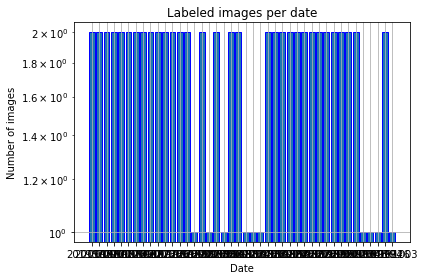

In [68]:
plt.bar(sorted(finalIndex.index),finalIndex[sorted(finalIndex.index)],edgecolor = 'b', log=True)
plt.xlabel('Date')
plt.ylabel('Number of images')
plt.title('Labeled images per date')
plt.grid(visible=None)
plt.tight_layout()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()